In [2]:
#importing librarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

data = pd.read_csv("C:\\Users\\irosh\\Downloads\\asteroiddataset\\Nasa_Asteroids_Data.csv")

In [3]:
#descriptive statistics

print("Information of the dataset")
print(data.info())
print("Summary of dataset")
print(data.describe())
print("First 5 rows of dataset")
print(data.head(5))

Information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 

In [4]:
# Checking for missing values in the dataset

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


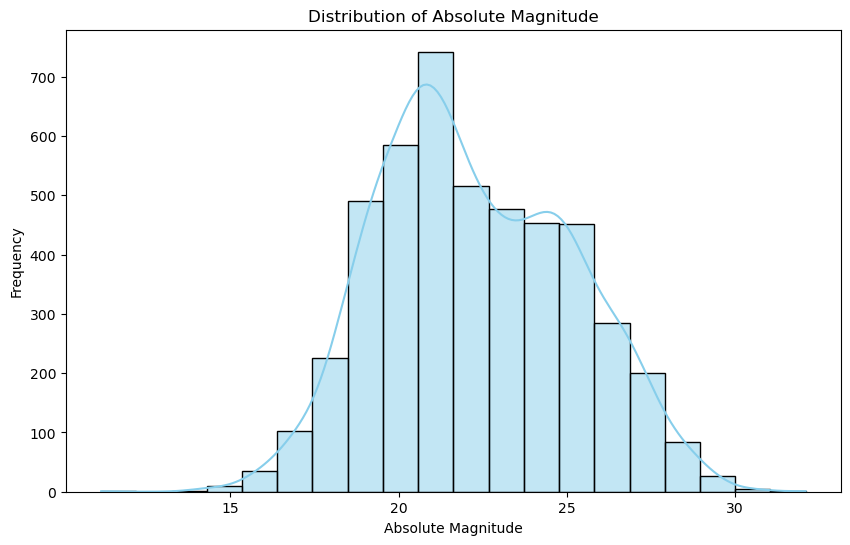

In [5]:
#EDA

# distribution of Absolute Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(data['Absolute Magnitude'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

- **Peak Frequency:** The most common absolute magnitudes are clustered around 20-25.

- **General Trend:** The distribution peaks at an absolute magnitude slightly above 20 and then decreases.

- **Significant Drop:** As the absolute magnitude increases beyond approximately 25, the frequency drops significantly.

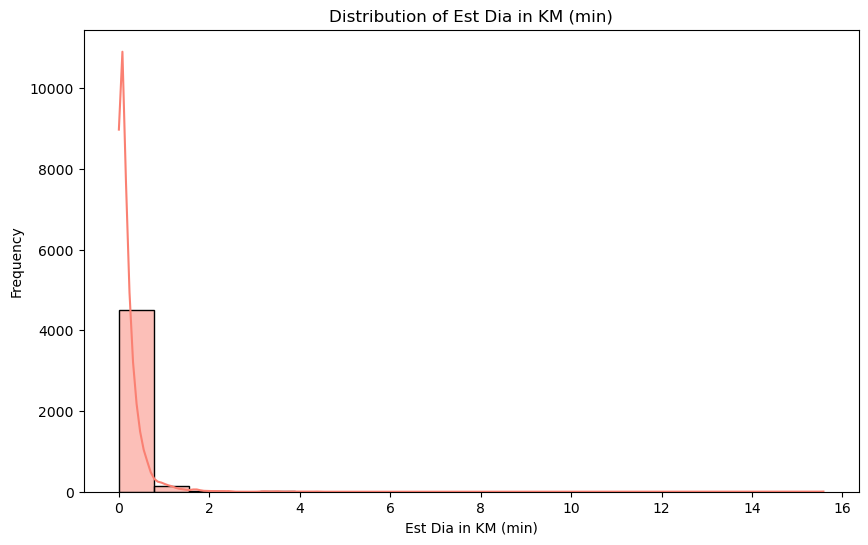

In [6]:
# distribution of Est Dia in KM
plt.figure(figsize=(10, 6))
sns.histplot(data['Est Dia in KM(min)'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Est Dia in KM (min)')
plt.xlabel('Est Dia in KM (min)')
plt.ylabel('Frequency')
plt.show()

- **Peak Frequency:** The majority of the data is concentrated around 0 to 2 kilometers in diameter, with a frequency reaching up to approximately 8000.

- **Outliers:** There is a red line extending upwards from the prominent red bar, indicating variability or an outlier within this range.

The graph suggests that smaller objects with diameters between 0 and 2 kilometers are more common.

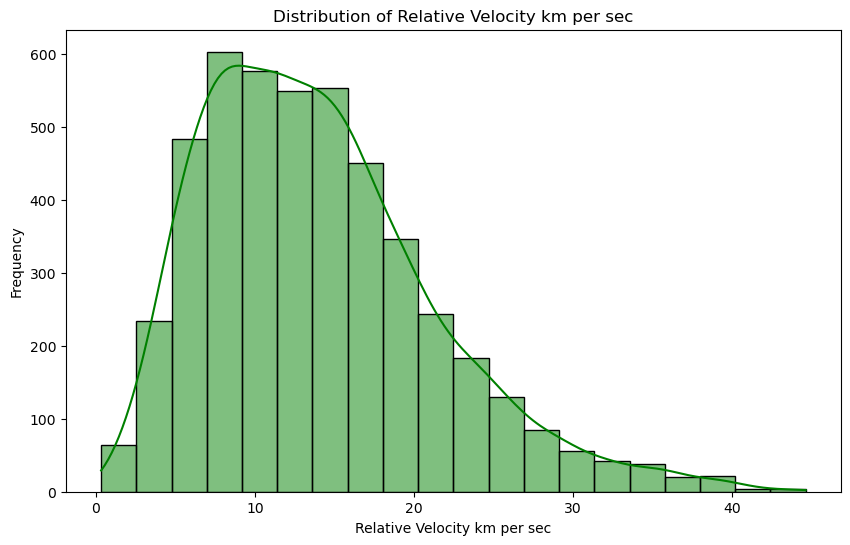

In [7]:
#  distribution of Relative Velocity km per sec
plt.figure(figsize=(10, 6))
sns.histplot(data['Relative Velocity km per sec'], bins=20, kde=True, color='green')
plt.title('Distribution of Relative Velocity km per sec')
plt.xlabel('Relative Velocity km per sec')
plt.ylabel('Frequency')
plt.show()

- **Peak Frequency:** The most common relative velocities are clustered around 10 km/s.
- **General Trend:** The distribution peaks at a relative velocity of approximately 10 km/s and then gradually decreases.
- **Variability:** There is a steady decline in frequency as the relative velocity increases beyond the peak.

The graph suggests that objects with relative velocities around 10 km/s are more prevalent.

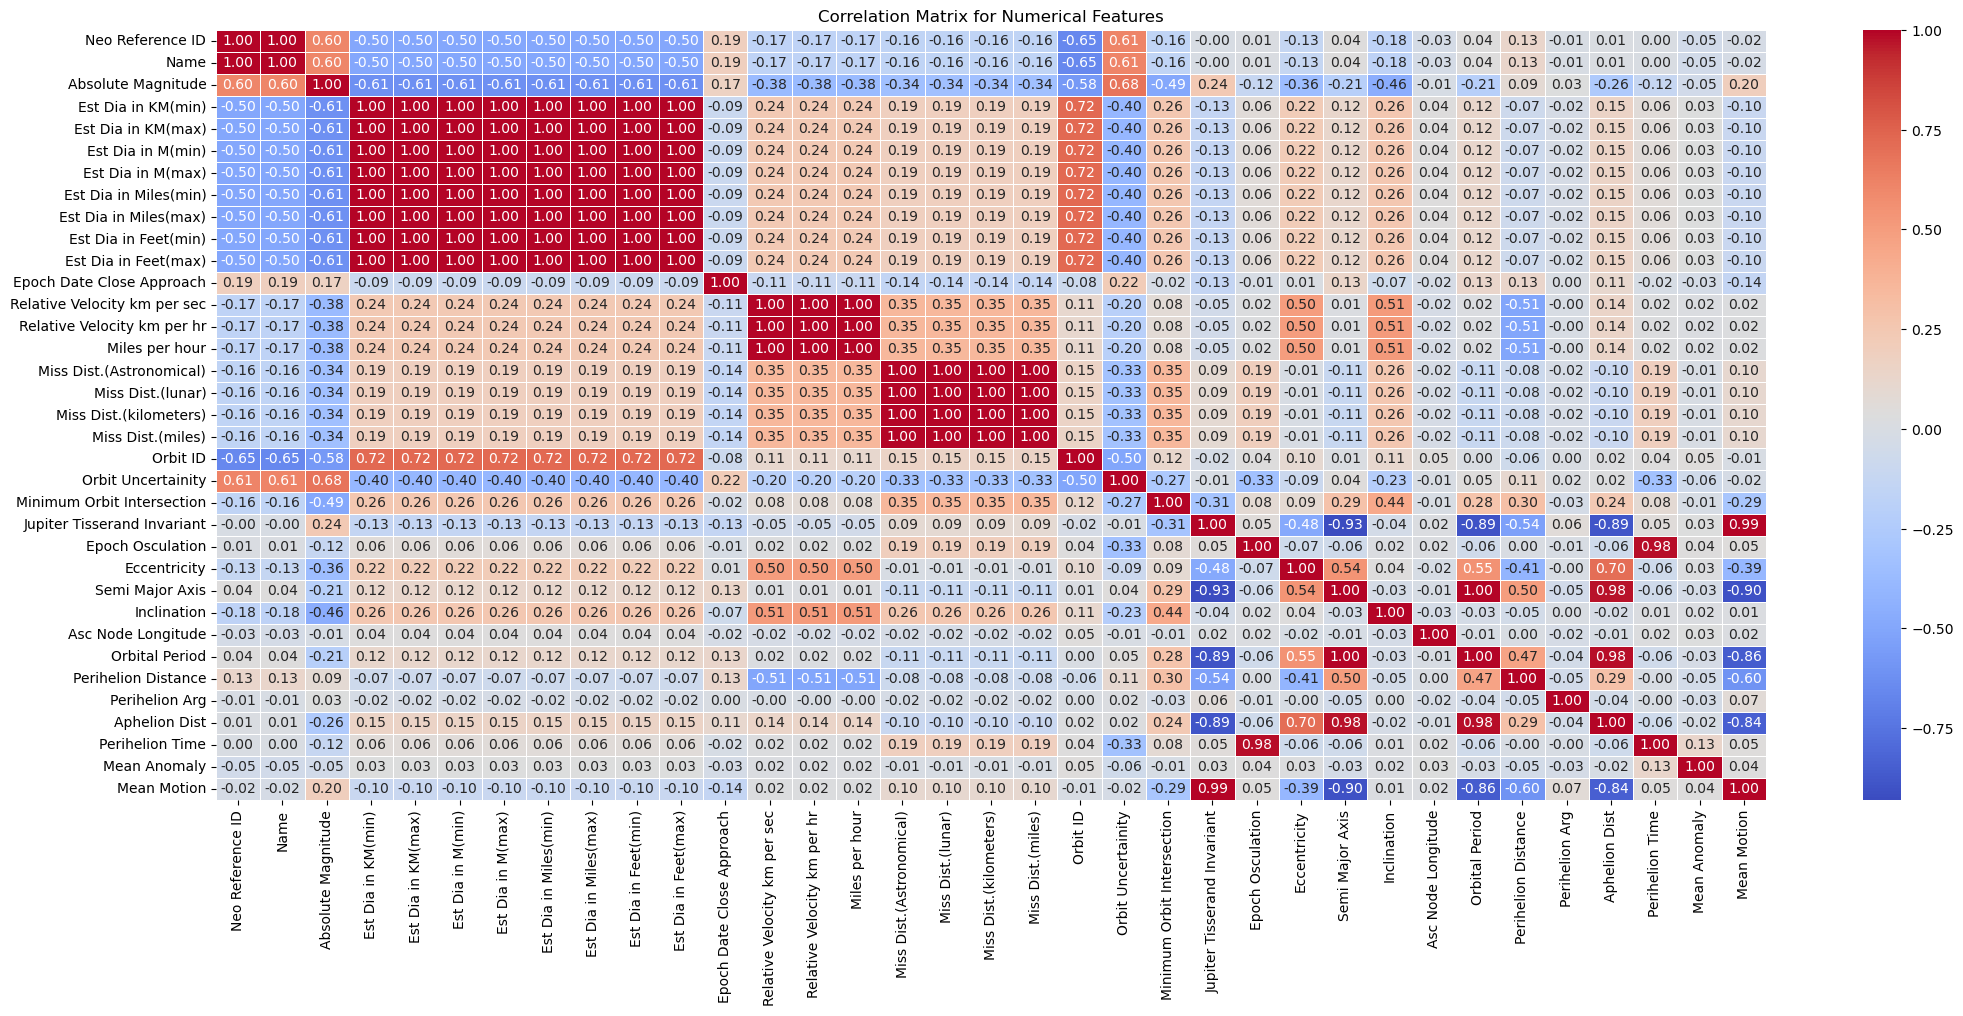

In [10]:
# Selecting numerical features for correlation matrix
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix for numerical features
correlation_matrix = data[numerical_features].corr()

# correlation matrix heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


- Variables along the diagonal (e.g., “Absolute Magnitude” with itself) have a coefficient of 1.00, representing perfect positive correlations (each variable’s relationship with itself).

- Some pairs exhibit strong positive or negative correlations, suggesting interdependencies.

- Outliers or unique relationships may exist based on the red lines extending from certain cells.

**Absolute Magnitude (Mv) and Est Dia in KM (min)** are positively correlated, implying that larger absolute magnitudes correspond to larger estimated diameters.

**Relative Velocity km per sec and Est Dia in KM (min)** also show a moderate positive correlation, indicating that faster relative velocities are associated with larger estimated diameters.


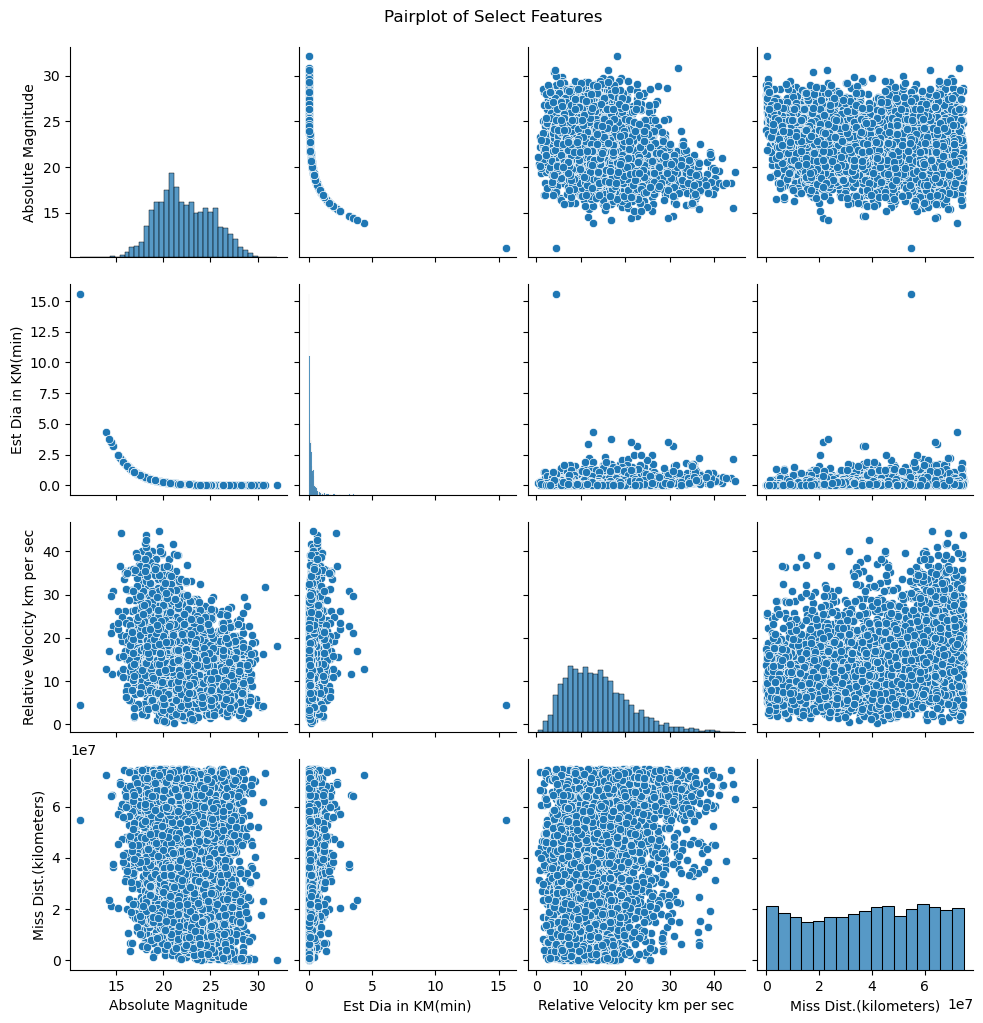

In [11]:
# Selecting a subset of features for pairplot 
selected_features = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']

# pairplot
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Select Features', y=1.02)
plt.show()


- Absolute Magnitude (Mv) has a normal-like distribution but skewed to the right.
- Est Dia in Km(min) shows an exponential decay, indicating that most values are small.
- Relative Velocity km per sec has a somewhat normal distribution but with irregularities.
- Miss Dist.(kilometers) 1e7 has an almost uniform distribution with some variations.

- **Absolute Magnitude (Mv) vs. Est Dia in Km(min):**
There’s an exponential decay pattern, suggesting that larger absolute magnitudes correspond to smaller estimated diameters.

- **Relative Velocity km per sec vs. Est Dia in Km(min):**
A moderate positive correlation exists, indicating that faster relative velocities are associated with larger estimated diameters.


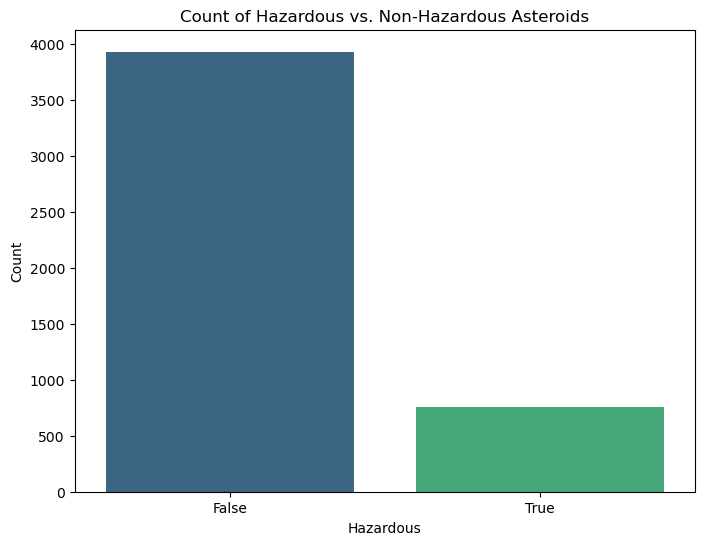

In [12]:
# Hazardous vs. Non-Hazardous
plt.figure(figsize=(8, 6))
sns.countplot(x='Hazardous', data=data, palette='viridis')
plt.title('Count of Hazardous vs. Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()


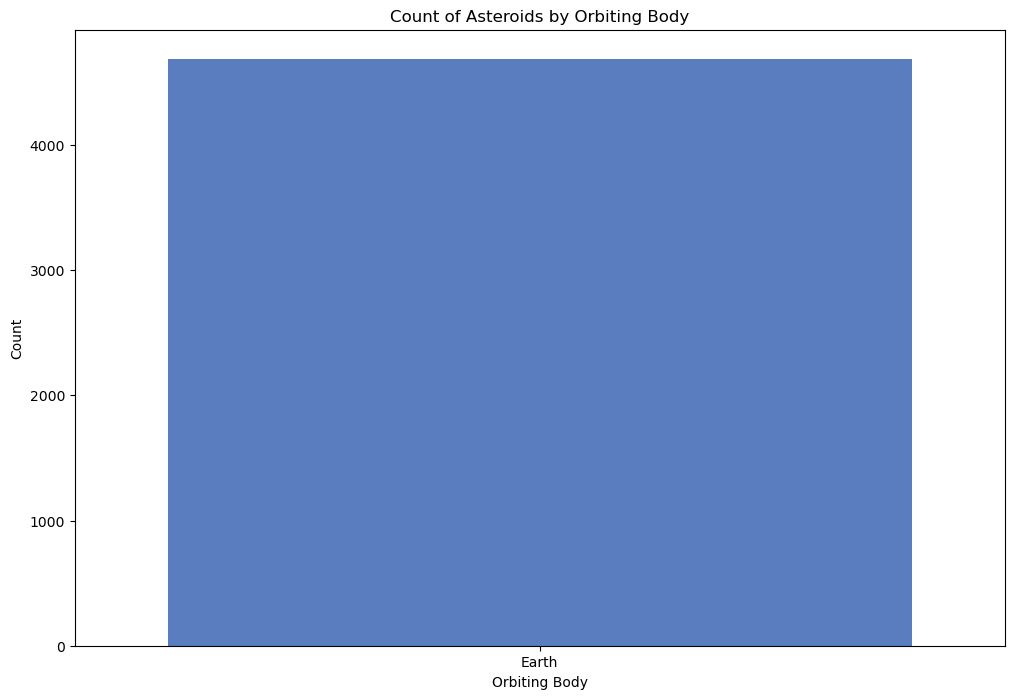

In [16]:
# Orbiting Body
plt.figure(figsize=(12, 8))
sns.countplot(x='Orbiting Body', data=data, palette='muted')
plt.title('Count of Asteroids by Orbiting Body')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.show()


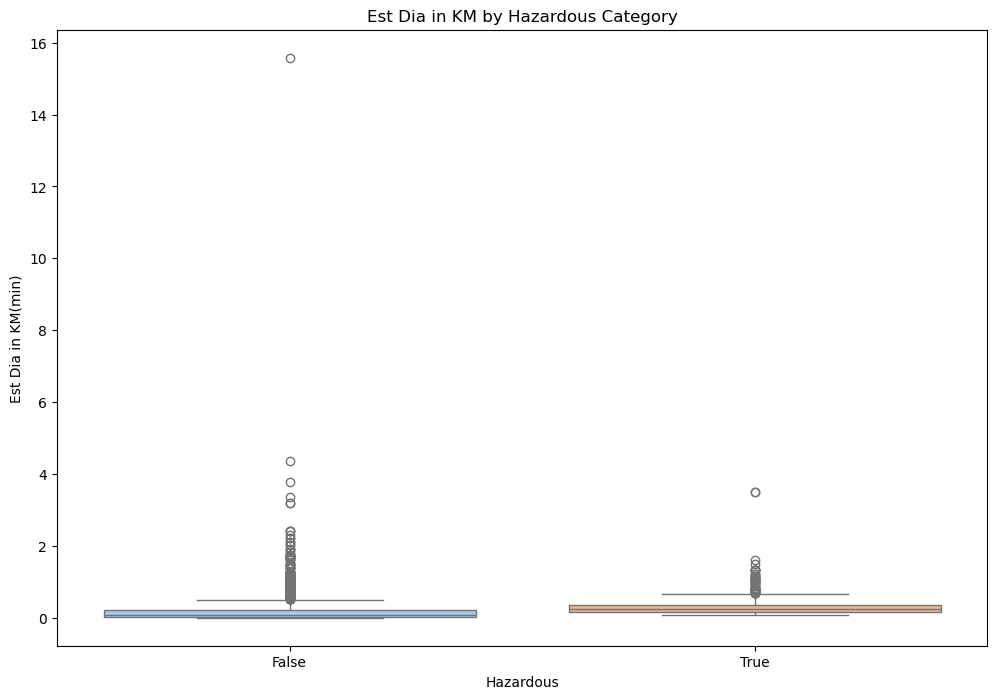

In [18]:
# Est Dia in KM by Hazardous Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Hazardous', y='Est Dia in KM(min)', data=data, palette='pastel')
plt.title('Est Dia in KM by Hazardous Category')
plt.xlabel('Hazardous')
plt.ylabel('Est Dia in KM(min)')
plt.show()


- **Diameter Distribution:** Most of the objects, both hazardous and non-hazardous, have a small estimated diameter. However, there are a few hazardous objects with larger diameters.

- **Outliers:** Under the “False” category, there’s one outlier at around 14 km. Under the “True” category, there’s one outlier at around 6 km.

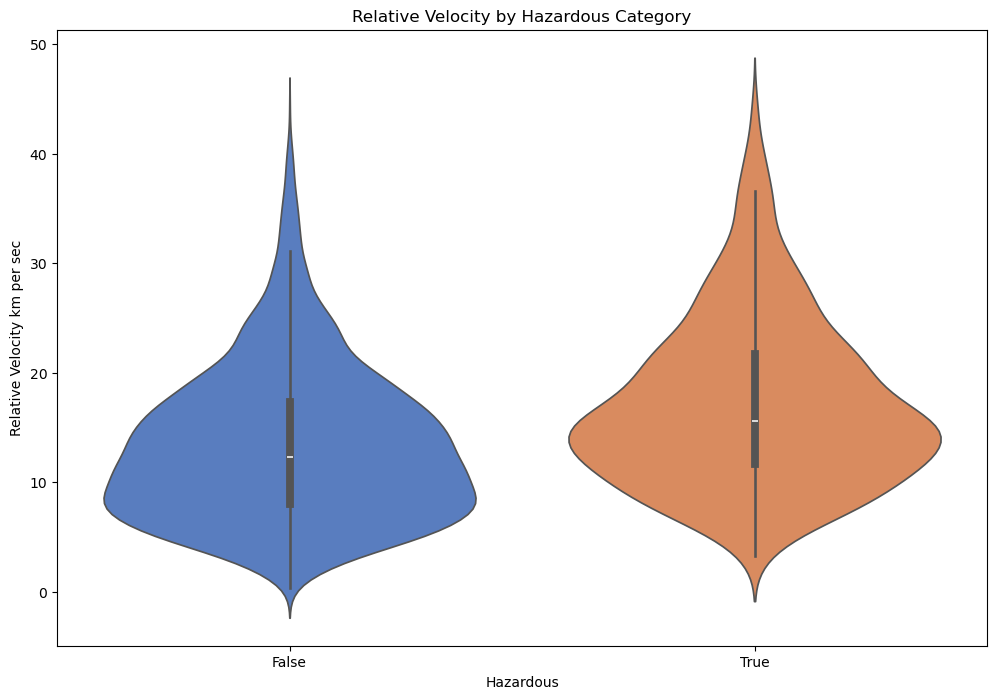

In [19]:
# Relative Velocity by Hazardous Category
plt.figure(figsize=(12, 8))
sns.violinplot(x='Hazardous', y='Relative Velocity km per sec', data=data, palette='muted')
plt.title('Relative Velocity by Hazardous Category')
plt.xlabel('Hazardous')
plt.ylabel('Relative Velocity km per sec')
plt.show()


- **Hazardous Category:** The objects are divided into two categories - “True” (hazardous) and “False” (non-hazardous).

- **Velocity Distribution:** Both hazardous and non-hazardous categories have a wide range of relative velocities. However, hazardous objects tend to have higher median relative velocity compared to non-hazardous ones.

- **Peak Velocities:** The peak velocity for non-hazardous objects is around 5 km/sec, while for hazardous objects it’s around 20 km/sec.

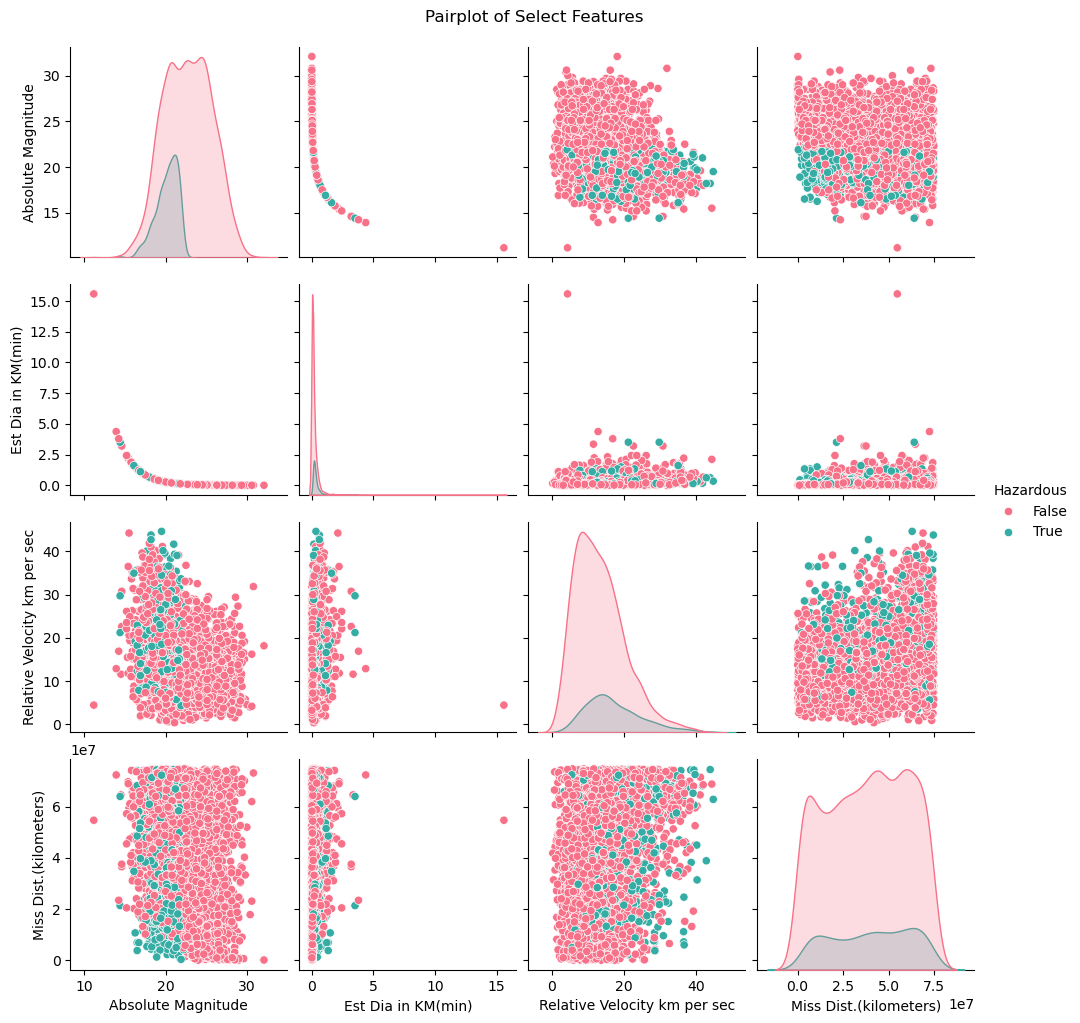

In [20]:
# Selecting a subset of features for pair plot
selected_features_pairplot = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Hazardous']

#pair plot
sns.pairplot(data[selected_features_pairplot], hue='Hazardous', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Select Features', y=1.02)
plt.show()

- **Absolute Magnitude:** There is a clear distinction in Absolute Magnitude between hazardous and non-hazardous objects; hazardous ones tend to have lower absolute magnitude.

- **Est Dia in Km(min):** Most of the objects, both hazardous and non-hazardous, have a smaller estimated diameter but doesn’t provide a clear separation between the two categories.

- **Relative Velocity km per sec:** There is an overlap between hazardous and non-hazardous objects; however, some hazardous objects exhibit higher relative velocity.

- **Miss Dist.(kilometers):** Both categories are mixed together without a clear pattern of separation.

In [27]:
import plotly.express as px
import plotly.graph_objects as go

# Selecting a few asteroids for radar chart 
selected_asteroids = data.sample(5, random_state=42)

# Creating a radar chart using plotly.graph_objects
fig_radar = go.Figure()

for index, row in selected_asteroids.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=row[['Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Hazardous']].tolist(),
        theta=['Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Hazardous'],
        fill='toself',
        name=row['Name']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 50]
        )
    ),
    title='Radar Chart for Select Asteroids'
)

fig_radar.show()


- Relative Velocity: All five asteroids have different relative velocities. The asteroid with the highest relative velocity appears to be hazardous.
- Miss Distance: All five asteroids have similar miss distances, indicating that they all have a similar distance of closest approach to Earth.

In [28]:

fig_3d_scatter = px.scatter_3d(data, x='Est Dia in KM(min)', y='Relative Velocity km per sec', z='Miss Dist.(kilometers)',
                               color='Hazardous', title='3D Scatter Plot for Est Dia, Relative Velocity, and Miss Dist.')
fig_3d_scatter.show()


In [29]:
fig_animated_bubble = px.scatter(data, x='Epoch Date Close Approach', y='Relative Velocity km per sec',
                                  size='Est Dia in KM(min)', color='Hazardous',
                                  animation_frame='Epoch Date Close Approach', title='Animated Bubble Chart for Relative Velocity over Time')
fig_animated_bubble.update_layout(title_x=0.5)
fig_animated_bubble.show()


<Figure size 1000x800 with 0 Axes>

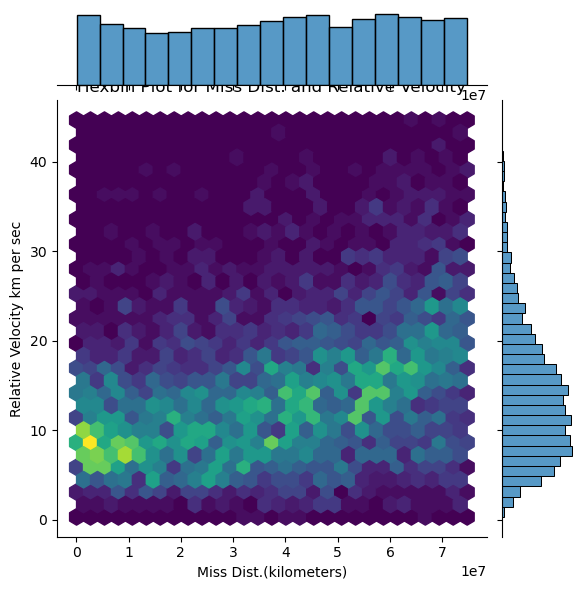

In [31]:

# Miss Dist. and Relative Velocity
plt.figure(figsize=(10, 8))
sns.jointplot(data=data, x='Miss Dist.(kilometers)', y='Relative Velocity km per sec', kind='hex', cmap='viridis')
plt.title('Hexbin Plot for Miss Dist. and Relative Velocity')
plt.show()

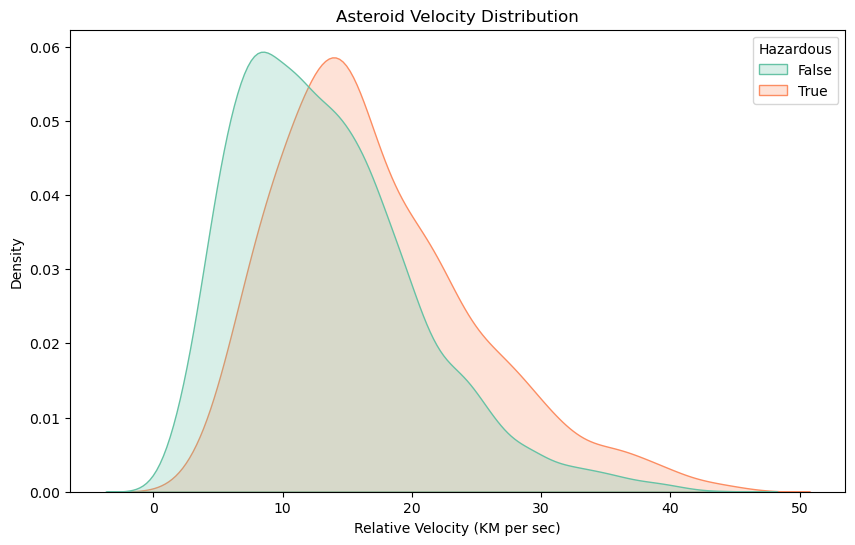

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Relative Velocity km per sec', hue='Hazardous', fill=True, common_norm=False, palette='Set2')
plt.title('Asteroid Velocity Distribution')
plt.xlabel('Relative Velocity (KM per sec)')
plt.ylabel('Density')
plt.show()


In [34]:
# Selecting a few asteroids for orbit visualization 
selected_asteroids = data.sample(5, random_state=42)

fig_orbit = px.scatter_3d(selected_asteroids, x='Semi Major Axis', y='Eccentricity', z='Inclination',
                          color='Hazardous', size='Perihelion Distance', title='Orbit Visualization')
fig_orbit.show()

Accuracy: 0.84
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


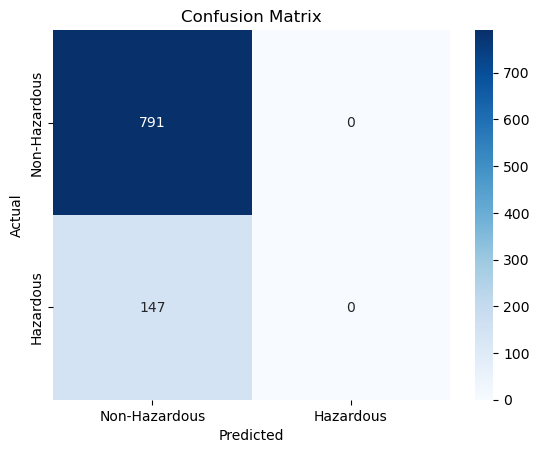

In [35]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#  'Hazardous' is the target variable
# Features
features = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)']
target = 'Hazardous'

# Splitting the dataset into features and target variable
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(random_state=42)

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Scaled Model Performance:
Accuracy: 0.84
Precision: 0.42
Recall: 0.07
F1 Score: 0.12


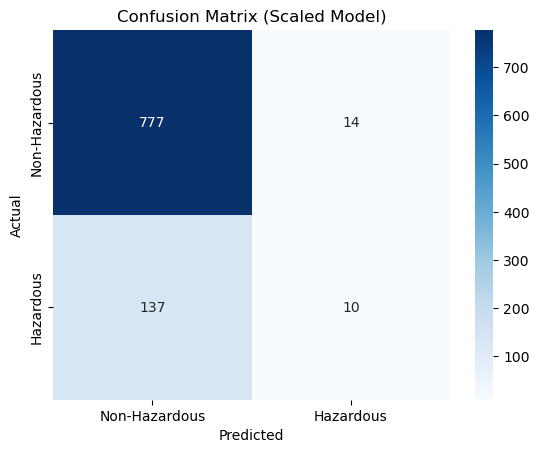

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
model_scaled = LogisticRegression(random_state=42)

# Training the model on the scaled training set
model_scaled.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluating the scaled model's performance
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

# evaluation metrics for the scaled model
print(f"Scaled Model Performance:")
print(f"Accuracy: {accuracy_scaled:.2f}")
print(f"Precision: {precision_scaled:.2f}")
print(f"Recall: {recall_scaled:.2f}")
print(f"F1 Score: {f1_scaled:.2f}")

# Confusion Matrix 
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Scaled Model)')
plt.show()


Best Model Performance:
Accuracy: 0.84
Precision: 0.40
Recall: 0.07
F1 Score: 0.12


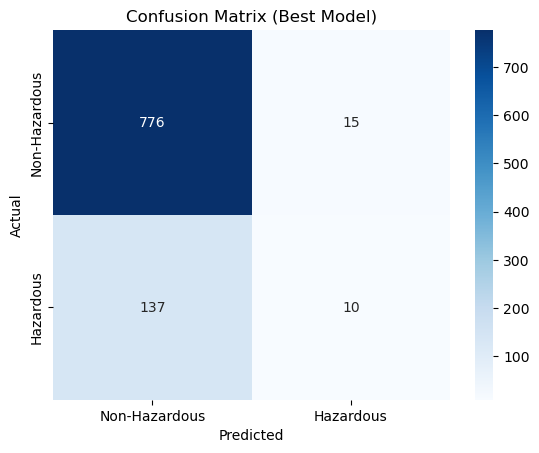

In [37]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

# Creating a grid search object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1')

# Fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Training a new model using the best hyperparameters
best_model = LogisticRegression(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing set using the best model
y_pred_best_model = best_model.predict(X_test_scaled)

# Evaluating the best model's performance
accuracy_best_model = accuracy_score(y_test, y_pred_best_model)
precision_best_model = precision_score(y_test, y_pred_best_model)
recall_best_model = recall_score(y_test, y_pred_best_model)
f1_best_model = f1_score(y_test, y_pred_best_model)

# evaluation metrics for the best model
print(f"Best Model Performance:")
print(f"Accuracy: {accuracy_best_model:.2f}")
print(f"Precision: {precision_best_model:.2f}")
print(f"Recall: {recall_best_model:.2f}")
print(f"F1 Score: {f1_best_model:.2f}")

# Confusion Matrix for the best model
conf_matrix_best_model = confusion_matrix(y_test, y_pred_best_model)
sns.heatmap(conf_matrix_best_model, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()


Random Forest Model Performance:
Accuracy: 0.85
Precision: 0.54
Recall: 0.37
F1 Score: 0.44


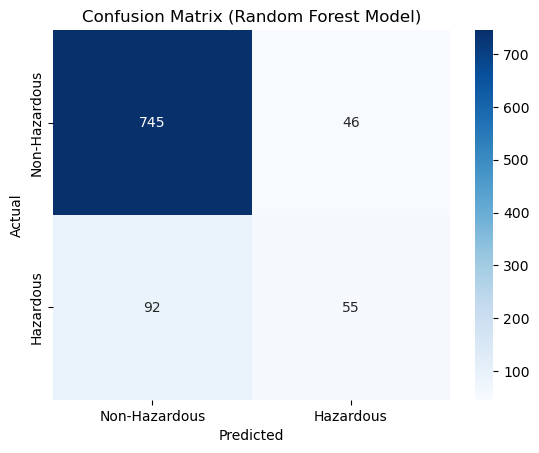

In [38]:
# Importing the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the scaled training set
rf_model.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# evaluation metrics for Random Forest model
print(f"Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

# Confusion Matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Model)')
plt.show()


Best Random Forest Model Performance:
Accuracy: 0.86
Precision: 0.57
Recall: 0.37
F1 Score: 0.45


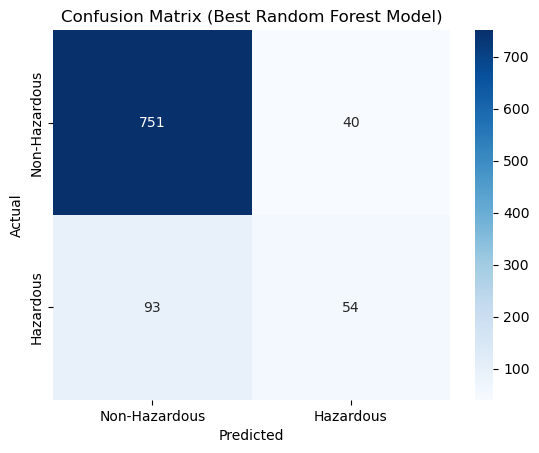

In [39]:
# Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a grid search object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')

# Fitting the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Getting the best hyperparameters for the Random Forest model
best_params_rf = grid_search_rf.best_params_

# Training a new Random Forest model using the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Making predictions on the scaled testing set using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluating the best Random Forest model's performance
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

# evaluation metrics for best Random Forest model
print(f"Best Random Forest Model Performance:")
print(f"Accuracy: {accuracy_best_rf:.2f}")
print(f"Precision: {precision_best_rf:.2f}")
print(f"Recall: {recall_best_rf:.2f}")
print(f"F1 Score: {f1_best_rf:.2f}")

# Confusion Matrix for best Random Forest model
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Random Forest Model)')
plt.show()


Gradient Boosting Model Performance:
Accuracy: 0.86
Precision: 0.72
Recall: 0.22
F1 Score: 0.34


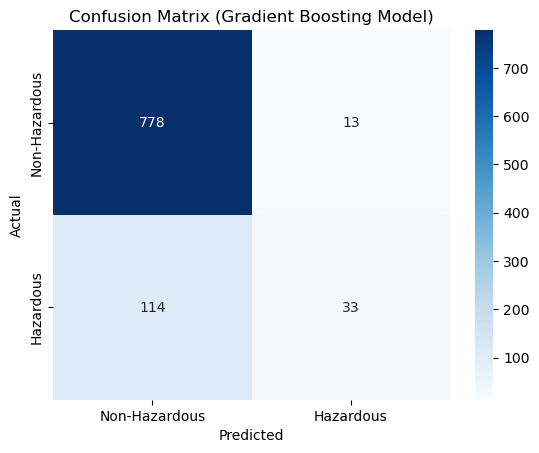

In [40]:
# Importing the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Creating a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Training the model on scaled training set
gb_model.fit(X_train_scaled, y_train)

# Making predictions on scaled testing set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluating Gradient Boosting model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# evaluation metrics for Gradient Boosting model
print(f"Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")

# Confusion Matrix for Gradient Boosting model
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting Model)')
plt.show()


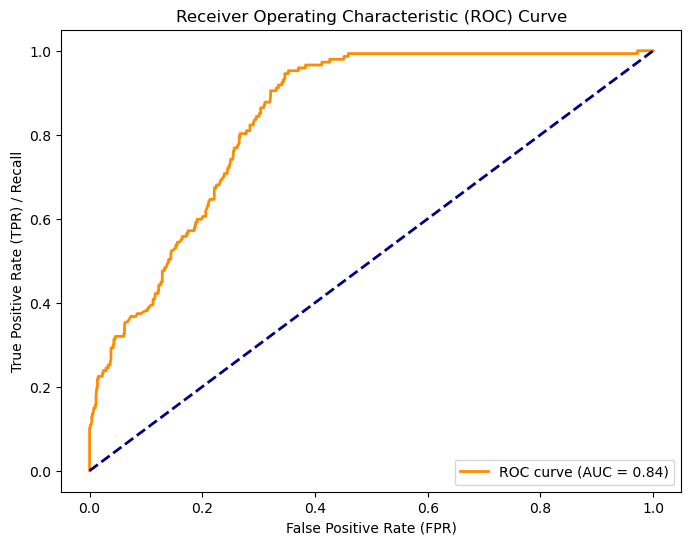

In [41]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- The curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The TPR is also known as Recall.

- The Area Under the Curve (AUC) is 0.84. This indicates a good level of model performance as it’s closer to 1. In other words, there is an 84% chance that the model will be able to distinguish between positive class and negative class.

- The dashed line represents a random classifier; any model should aim to have its ROC curve far above this line. The fact that the orange solid line (representing the ROC curve) rises steeply before leveling off indicates good classifier performance.

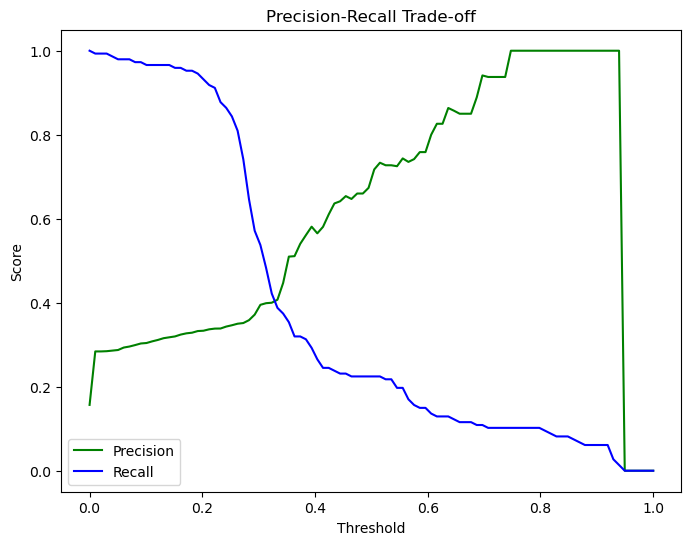

In [42]:
# Adjusting the threshold for different trade-offs between precision and recall
threshold_values = np.linspace(0, 1, 100)
precision_values = []
recall_values = []

for threshold in threshold_values:
    y_pred_threshold = (y_prob_gb > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precision_values.append(precision)
    recall_values.append(recall)

# Plotting precision-recall trade-off
plt.figure(figsize=(8, 6))
plt.plot(threshold_values, precision_values, label='Precision', color='green')
plt.plot(threshold_values, recall_values, label='Recall', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.show()


Model Performance at Threshold 0.4:
Accuracy: 0.85
Precision: 0.57
Recall: 0.27
F1 Score: 0.37


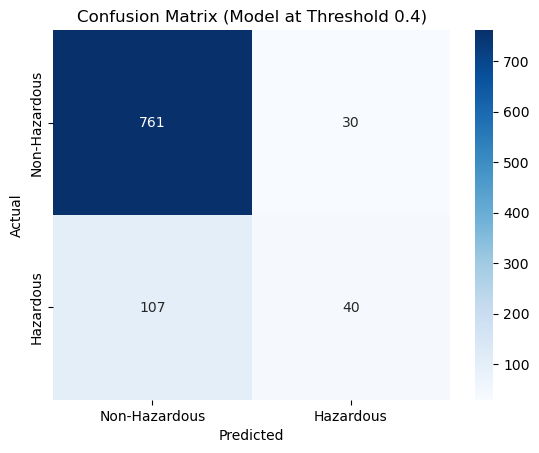

In [43]:
# Setting threshold
selected_threshold = 0.4

# Applying threshold to the predicted probabilities
y_pred_threshold = (y_prob_gb > selected_threshold).astype(int)

# Evaluate the model's performance at selected threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)

# evaluation metrics for model at selected threshold
print(f"Model Performance at Threshold {selected_threshold}:")
print(f"Accuracy: {accuracy_threshold:.2f}")
print(f"Precision: {precision_threshold:.2f}")
print(f"Recall: {recall_threshold:.2f}")
print(f"F1 Score: {f1_threshold:.2f}")

# Confusion Matrix for model at selected threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'],
            yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Model at Threshold {selected_threshold})')
plt.show()


In [46]:
# Retriving feature names used during training
feature_names = X_train.columns

# Selecting corresponding columns from current dataset
X_scaled_dataset = scaler.transform(data[feature_names])

# Applying final model to entire dataset
y_pred_dataset = (gb_model.predict_proba(X_scaled_dataset)[:, 1] > selected_threshold).astype(int)

# Adding predictions to original dataset
data['Predicted_Hazardous'] = y_pred_dataset

# sample of dataset with predictions
print(data[['Name', 'Hazardous', 'Predicted_Hazardous']].sample(10))


         Name  Hazardous  Predicted_Hazardous
1946  3328630      False                    0
3243  3591407       True                    1
4031  3689357      False                    0
1348  3151655      False                    0
3528  3596030      False                    0
3856  2164222      False                    0
1460  3476774      False                    0
725   3114026      False                    0
538   3013045       True                    0
121   3771633      False                    0


In [47]:
# Saving dataset with actual and predicted labels to a CSV file
data.to_csv("asteroid_predictions.csv", index=False)
